In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BBFSeDiV-o6Adj-VE1znyTDbgF2rydeLaDMA9S561xQk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'modelbuildingmachinelearningbased-donotdelete-pr-oes3gfyjkahzot'
object_key = 'carperformance.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

car = pd.read_csv(body)
car.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
car.shape

(398, 9)

In [4]:
car.columns=["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","carname"]

In [5]:
car.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'carname'],
      dtype='object')

In [6]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd3a19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd3a1fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd3a16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd340520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd3407f0>],
 'means': []}

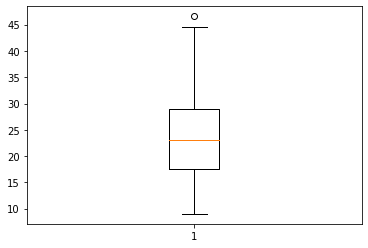

In [7]:
plt.boxplot(car.mpg)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd2a4bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd233190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd2a48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd233760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd233a60>],
 'means': []}

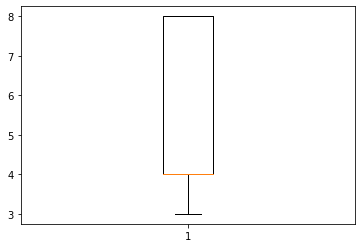

In [8]:
plt.boxplot(car.cylinders)

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'modelyear'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

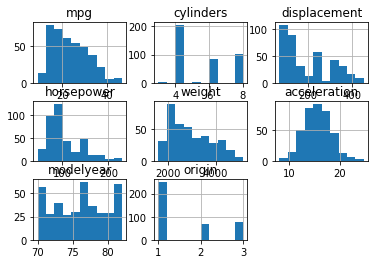

In [9]:
car.hist()

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

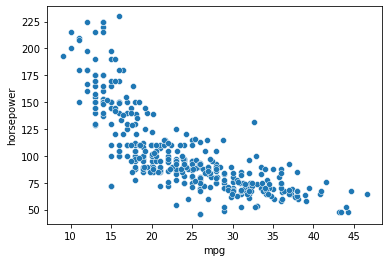

In [10]:
sns.scatterplot(x=car.mpg,y=car.horsepower)

(array([ 27.,  97., 124.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

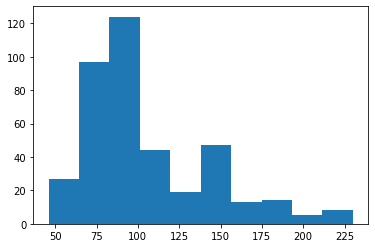

In [11]:
plt.hist(car.horsepower)

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [13]:
car.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [14]:
car.horsepower.fillna(car.horsepower.mean(),inplace=True)

In [15]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31e4cee1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31e4cee640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31e4cdbeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31e4ceebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31e4ceeeb0>],
 'means': []}

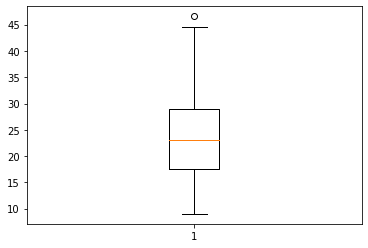

In [16]:
plt.boxplot(car.mpg)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31e4c46c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31e4c56220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31e4c46970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31e4c567c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31e4c56a90>],
 'means': []}

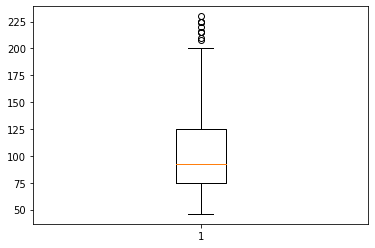

In [17]:
plt.boxplot(car.horsepower)

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


<BarContainer object of 398 artists>

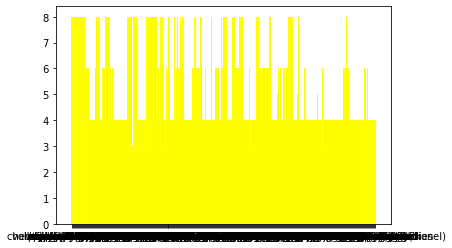

In [19]:
plt.bar(car.carname,car.cylinders,color="yellow")

In [20]:
car.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

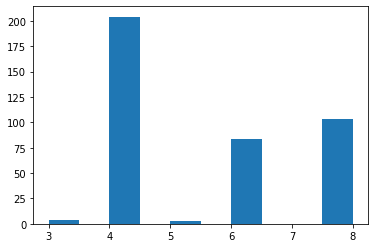

In [21]:
plt.hist(car.cylinders)

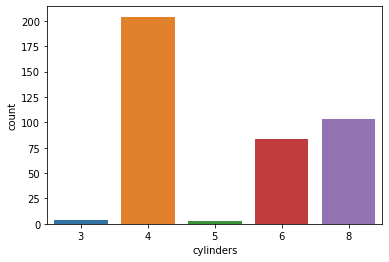

In [22]:
d=sns.countplot(x="cylinders",data=car)

In [23]:
car.cylinders=car.cylinders.replace(3,'below_5')
car.cylinders=car.cylinders.replace(4,'below_5')
car.cylinders=car.cylinders.replace(5,'below_5')

<AxesSubplot:xlabel='cylinders', ylabel='count'>

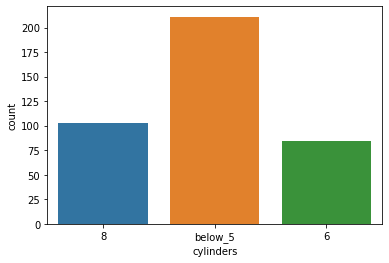

In [24]:
sns.countplot(x=car.cylinders)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

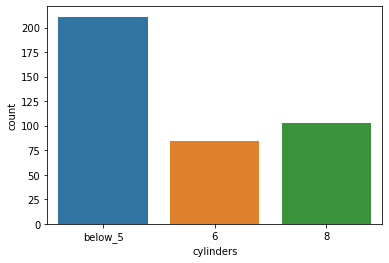

In [25]:
sns.countplot(x=car.cylinders,order=['below_5',6,8])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc13d640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc13dbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc13d370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc14a1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc14a490>],
 'means': []}

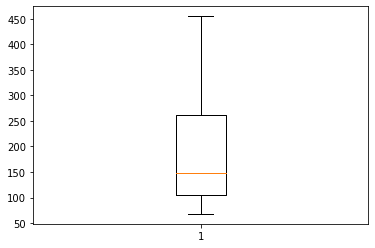

In [26]:
plt.boxplot(car.displacement)

In [27]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [28]:
stats.shapiro(car.displacement)


ShapiroResult(statistic=0.8804193139076233, pvalue=5.1434173206608516e-17)

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

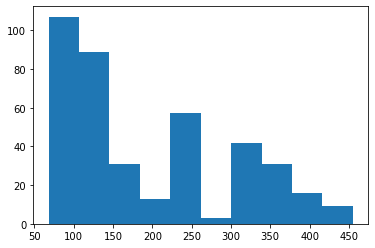

In [29]:
plt.hist(car.displacement)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31bffe8220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31bffe87c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31bffdcf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31bffe8d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31bfff8070>],
 'means': []}

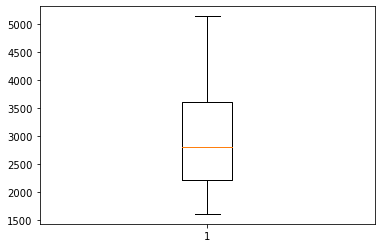

In [30]:
plt.boxplot(car.weight)

In [31]:
stats.shapiro(car.weight)


ShapiroResult(statistic=0.9413594603538513, pvalue=1.9702153103429154e-11)

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

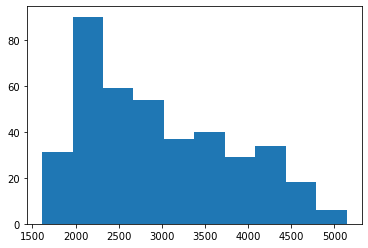

In [32]:
plt.hist(car.weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31bff3d730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31bff3dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31bff3d460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31bfeca2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31bfeca580>],
 'means': []}

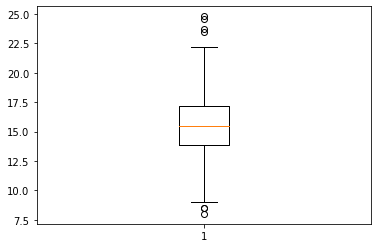

In [33]:
plt.boxplot(car.acceleration)

In [34]:
stats.shapiro(car.acceleration)

ShapiroResult(statistic=0.9923787713050842, pvalue=0.039872437715530396)

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

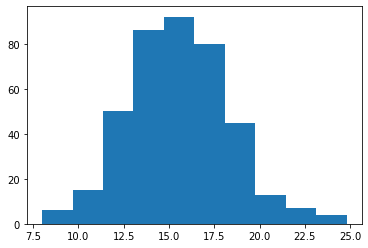

In [35]:
plt.hist(car.acceleration)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31bfe14b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31bfe25160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31bfe148b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31bfe25700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31bfe259d0>],
 'means': []}

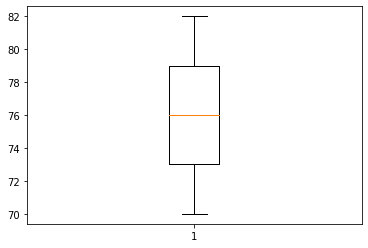

In [36]:
plt.boxplot(car.modelyear)

In [37]:
stats.shapiro(car.modelyear)

ShapiroResult(statistic=0.9458516240119934, pvalue=6.962785209507771e-11)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='modelyear', ylabel='count'>

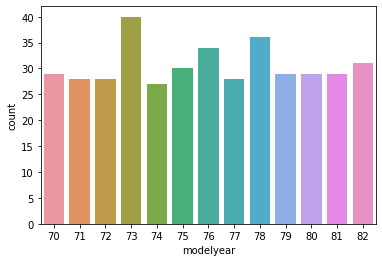

In [38]:
sns.countplot(car.modelyear,data=car)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31bfd0fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31bfd1f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31bfd0fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31bfd1f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31bfd1fb50>],
 'means': []}

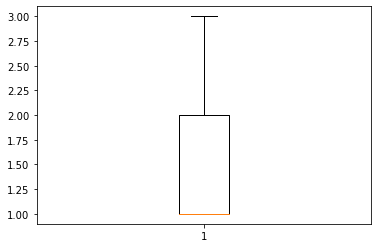

In [39]:
plt.boxplot(car.origin)

In [40]:
stats.shapiro(car.origin)

ShapiroResult(statistic=0.6739088296890259, pvalue=5.797658882025973e-27)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

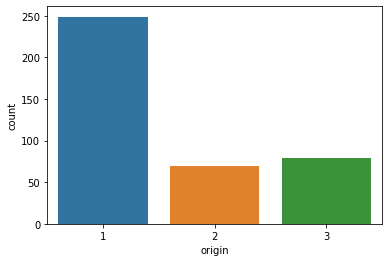

In [41]:
sns.countplot(car.origin,data=car)

In [42]:
stats.f_oneway(car.modelyear[car.cylinders=='below_5'],car.modelyear[car.cylinders==6],car.modelyear[car.cylinders==8])

F_onewayResult(statistic=29.021777566579576, pvalue=1.7389414133646237e-12)

In [43]:
stats.f_oneway(car.origin[car.cylinders=='below_5'],car.origin[car.cylinders==6],car.origin[car.cylinders==8])

F_onewayResult(statistic=99.29093583417232, pvalue=1.1627923993965917e-35)

In [44]:
stats.f_oneway(car.mpg[car.cylinders=='below_5'],car.mpg[car.cylinders==6],car.mpg[car.cylinders==8])

F_onewayResult(statistic=328.4941105950235, pvalue=9.567052215635294e-85)

In [45]:
car.drop(["cylinders","modelyear","origin","carname"],axis=1,inplace=True)

In [46]:
car.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [47]:
data = car.drop(columns=['displacement', 'acceleration'])
X = data.iloc[:, 1:]
Y = data['mpg']

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[0.45652174, 0.5361497 ],
       [0.64673913, 0.58973632],
       [0.56521739, 0.51686986],
       [0.56521739, 0.51601928],
       [0.51086957, 0.52055571],
       [0.82608696, 0.77346187],
       [0.94565217, 0.77714772],
       [0.91847826, 0.76523958],
       [0.97282609, 0.79727814],
       [0.7826087 , 0.63425007],
       [0.67391304, 0.5528778 ],
       [0.61956522, 0.56592005],
       [0.56521739, 0.60901616],
       [0.97282609, 0.41763538],
       [0.26630435, 0.21519705],
       [0.26630435, 0.34590303],
       [0.27717391, 0.32917494],
       [0.21195652, 0.27615537],
       [0.22826087, 0.1465835 ],
       [0.        , 0.06294301],
       [0.22282609, 0.30025517],
       [0.23913043, 0.23164162],
       [0.26630435, 0.21604763],
       [0.36413043, 0.17607031],
       [0.23913043, 0.29345052],
       [0.91847826, 0.85114828],
       [0.83695652, 0.78338531],
       [0.89130435, 0.78508648],
       [0.79891304, 0.88432095],
       [0.22826087, 0.1465835 ],
       [0.

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [51]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [52]:
pred = regressor.predict(X_test)
pred[:5]

array([26.54263125, 23.18723849, 10.49922839, 25.92840865, 19.30533443])

In [53]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred)

0.7101144551051928

# RandomForestRegression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(n_estimators=30,random_state=0)

In [56]:
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [57]:
y_pred = rf.predict(X_test)

In [58]:

y_pred

array([22.31333333, 18.66666667, 12.9       , 28.09      , 16.91333333,
       18.69      , 27.88666667, 20.96666667, 20.63333333, 31.43      ,
       15.9       , 15.81666667, 32.91      , 22.8       , 25.34      ,
       31.04666667, 15.18333333, 40.38      , 13.56666667, 14.54666667,
       31.02333333, 16.14666667, 16.07222222, 18.19666667, 31.22333333,
       34.01      , 14.3       , 25.63666667, 29.63333333, 27.23333333,
       24.93      , 19.33666667, 13.61666667, 29.07      , 10.7       ,
       12.        , 19.71333333, 21.6       , 21.39666667, 25.27333333,
       28.        , 16.86666667, 16.14666667, 28.        , 30.94333333,
       21.22      , 14.55      , 20.1       , 26.38666667, 29.66666667,
       15.9       , 16.73333333, 18.25      , 28.70333333, 27.83333333,
       21.25333333, 28.49333333, 12.03333333, 19.34      , 14.6       ,
       24.33333333, 13.28333333, 18.44      , 16.56666667, 32.15666667,
       32.22666667, 30.63333333, 27.27      , 30.02333333, 26.38

#  Model Evaluation

In [59]:

from sklearn.metrics import r2_score,mean_squared_error

In [60]:
value = r2_score(Y_test, y_pred)

In [61]:

value

0.7683700272734649

In [62]:

err=np.sqrt(mean_squared_error(Y_test,y_pred))

In [63]:

err

4.022677028844729

# Exporting the model

In [64]:
import pickle

In [65]:
pickle.dump(rf,open('RFregression.pkl','wb'))

In [66]:
!pip install ibm-watson-machine-learning

In [67]:
from ibm_watson_machine_learning import APIClient 
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"LM-mZCwYDKxaN4Kla8MIGWT84fA-tna3Jt7t-9xUJzqK",
                
}
client = APIClient(wml_credentials)

In [68]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [69]:
space_uid = guid_from_space_name(client, 'project')
print("Space UID-" + space_uid)   

{'resources': [{'entity': {'description': 'project about car', 'name': 'project', 'scope': {'bss_account_id': '7f2fa21ee9c14df7b49d24d6efe4281f'}, 'stage': {'production': False}, 'status': {'state': 'active'}, 'storage': {'properties': {'bucket_name': 'ac1e1b01-8319-4526-a69c-3111f9069c6c', 'bucket_region': 'us-south', 'credentials': {'admin': {'access_key_id': 'd6185fe570334fc29ff6ba79667fb388', 'api_key': 'PdRcKlbYidxIdPHFjvl3VhEDpBJdnpnqzSbk3KMuITTV', 'secret_access_key': 'c27492539688ff745748598c7a914f08676ae760e23d70f1', 'service_id': 'ServiceId-90839a1f-bbba-4c5c-bfe6-df9450448124'}, 'editor': {'access_key_id': '77fa9b6a480b41049763de6e4c9c27c9', 'api_key': '6EFk6v6R7d00pyU6YJsUuoxBPmtTIhnCPBWf2DkZKyPF', 'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/7f2fa21ee9c14df7b49d24d6efe4281f:9f19efa6-472c-417a-9e62-8d96aed71b01::', 'secret_access_key': 'c6ff262d38b120b365b6d205c61e447d6071f348d4b8245d', 'service_id': 'ServiceId-672ec292-eba9-4343-bf9b-e636fd27d87

In [70]:
client.set.default_space(space_uid)

'SUCCESS'

In [71]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [72]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [73]:
!pip install -U pyspark==2.1.2.

In [74]:
!wget https://raw.githubusercontent.com/IBM/monitor-wml-model-with-watson-openscale/master/data/additional_feedback_data.json

--2022-11-18 10:40:35--  https://raw.githubusercontent.com/IBM/monitor-wml-model-with-watson-openscale/master/data/additional_feedback_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16506 (16K) [text/plain]
Saving to: ‘additional_feedback_data.json.3’

additional_feedback 100%[===================>]  16.12K  --.-KB/s    in 0.001s  

2022-11-18 10:40:36 (22.5 MB/s) - ‘additional_feedback_data.json.3’ saved [16506/16506]



In [87]:
model_details = client.repository.store_model(model=rf,meta_props={
client.repository.ModelMetaNames.NAME: 'random forest',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid    
})

In [89]:
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [90]:
model_id

'8a24fa8a-6834-4ac0-a548-4d1f272066d6'

In [85]:
X_train[0]

array([0.27717391, 0.25318968])